# Part 1
Import the kirby 21 data set. 

In [1]:
!wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv

--2020-09-21 15:38:20--  https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1611966 (1.5M) [text/plain]
Saving to: ‘kirby21.csv’

kirby21.csv         100%[===================>]   1.54M  --.-KB/s    in 0.1s    

2020-09-21 15:38:21 (14.2 MB/s) - ‘kirby21.csv’ saved [1611966/1611966]



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[531111, 545603, 483107, 558849, 509945, 538936, 506151, 457862, 551654, 482556, 483496, 373246, 526596, 468915, 516579, 467063, 486629, 557758, 468971, 512967]
[543404, 552216, 490805, 568830, 518902, 541024, 516742, 461817, 570542, 490654, 488470, 380492, 543440, 473350, 519582, 470488, 495646, 572435, 476112, 519178]


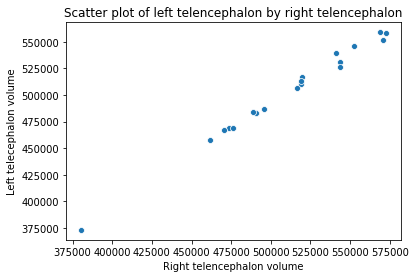

In [2]:
import numpy as np
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("kirby21.csv");
# isolate the column of data for left by setting the desired roi value to 
left = df.loc[df['roi'] == 'Telencephalon_L'];
left = left.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'level', 'id', 'icv', 'tbv', 'mean', 'std', 'type', 'roi'], axis = 1);
left = left[left.columns[-1]].tolist();
#rightMostDeaths = dr2[dr2.columns[len(dr2.columns) - 1]];
print(left);
right = df.loc[df['roi'] == 'Telencephalon_R'];
right = right.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'level', 'id', 'icv', 'tbv', 'mean', 'std', 'type', 'roi'], axis = 1);
right = right[right.columns[-1]].tolist();
print(right);

sns.scatterplot(right, left);
plt.title("Scatter plot of left telencephalon by right telencephalon");
plt.xlabel("Right telencephalon volume");
plt.ylabel("Left telecephalon volume");



# Part 2


printing from input of finding left from right
[-5.814338673277198e-13, 0.9500552111008128]
[5.150393097689459e-13, 1.0442415398322407]


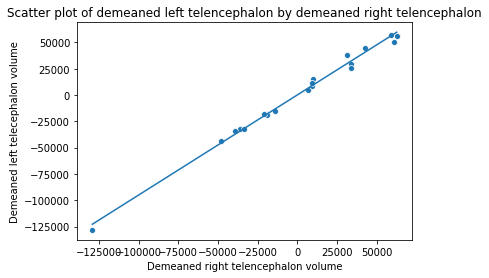

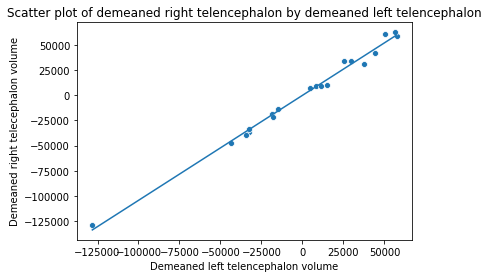

In [3]:
# Demean both the left and right telencephalon volume data
left -= np.mean(left);
right -= np.mean(right);

# Plot the left by right scatterplot
plt.figure();
sns.scatterplot(right, left);
plt.title("Scatter plot of demeaned left telencephalon by demeaned right telencephalon");
plt.xlabel("Demeaned right telencephalon volume");
plt.ylabel("Demeaned left telecephalon volume");

# Plot the regression line
beta1 = st.pearsonr(right, left)[0] * np.std(left) / np.std(right);
beta0 = np.mean(left) - np.mean(right) * beta1;
print("printing from input of finding left from right")
print([beta0, beta1]);
sns.lineplot(right, beta0 + beta1 * right);

# Plot the right by left scatterplot
plt.figure();
sns.scatterplot(left, right);
plt.title("Scatter plot of demeaned right telencephalon by demeaned left telencephalon");
plt.xlabel("Demeaned left telencephalon volume");
plt.ylabel("Demeaned right telecephalon volume");

# Plot the regression line
beta1 = st.pearsonr(left, right)[0] * np.std(right) / np.std(left);
beta0 = np.mean(right) - np.mean(left) * beta1;
print([beta0, beta1]);
sns.lineplot(left, beta0 + beta1 * left);

# Part 3

Let $Y = B_{old}X$ be a regression model through the origin. If we replaced X with cX, the model would be $Y = B_{new}(cX) = (B_{new}c)X$. If we let our old $B_{old}$ be $B_{old} = B_{new} c$, then if we divide both sides of this equation by c, we get $B_{new} = \frac{B_{old}}{c}$. Thus, the new constant for $\beta_1$ in a model where X is replaced by cX is $\beta_1 = \frac{B_{old}}{c}$.

If |c| < 1, then the slope of the new regression line will be steeper than the slope of the original model. If |c| > 1, then the slope of the new regression line will be less steep than the slope of the original model. If c < 0, the slope of the new regression line will be the opposite sign of the slope of the original regression line. Regardless of the value of c, the new regression line will still pass through the origin. 

# Part 4

We want to show that $\hat Y$ is the group mean for group 1 if $X=1$ and the group mean for group 0 if $X=0$. 

We know that $\hat Y = \hat \beta_0 + \hat \beta_1 X$. 

In the hint we are given, it is proven that 
$\hat \beta_0 = \bar y_0$ and $\hat \beta_0 + \hat \beta_1 = \bar y_1$. We can rearrange the second equation in this hint to get that $\hat \beta_1 = \bar y_1 - \hat \beta_0 = \bar y_1 - \bar y_0$. 

If we substitute for $\beta_1$ and $\beta_0$ in our first equation, we can consider two cases: when X = 1 and when X = 0.



*   Case 1: X = 1
    
    $\hat Y = \hat \beta_0 + \hat \beta_1 X$

     $\hat Y = \bar y_0 + (\bar y_1 - \bar y_0) X$

     Substitute X = 1

      $\hat Y = \bar y_0 + (\bar y_1 - \bar y_0) (1)$

       $\hat Y = \bar y_0 + \bar y_1 - \bar y_0$
      
      $\hat Y = \bar y_1$

*   Case 2: X = 0
 $\hat Y = \hat \beta_0 + \hat \beta_1 X$

     $\hat Y = \bar y_0 + (\bar y_1 - \bar y_0) X$

     Substitute X = 0

      $\hat Y = \bar y_0 + (\bar y_1 - \bar y_0) (0)$

       $\hat Y = \bar y_0 + 0$
      
      $\hat Y = \bar y_0$


# Part 5
We know 

$\hat \beta_1 = Cor(Y, X)*\frac{Sd(Y)}{Sd(X)} $ 

$\hat \beta_0 = \bar{Y} - \hat \beta_1 \bar{X} $ 

Thus, we need to utilize the correlation, standard deviation, and mean functions. 


In [4]:

def betaVals (x, y): 
  # might be able to use the st.pearsonr function instead of the np.corrcoef
  beta1 = np.corrcoef(y, x) * np.std(y) / np.std(x);
  beta1 = beta1[0, 1]; # extract the right value from the matrix
  beta0 = np.mean(y) - (beta1 * np.mean(x));
  return beta0, beta1;

# Test it on the values from above
tempBeta0, tempBeta1 = betaVals(right, left);

print("Expected [1.0004441719502211e-12, 0.9500552111008128]");
print(tempBeta0); 
print(tempBeta1);

secondTempBeta0, secondTempBeta1 = betaVals(left, right);
print("Expected [-1.04470536263349e-12, 1.0442415398322407]");
print(secondTempBeta0);
print(secondTempBeta1);




Expected [1.0004441719502211e-12, 0.9500552111008128]
-5.814338673277165e-13
0.950055211100813
Expected [-1.04470536263349e-12, 1.0442415398322407]
5.150393097689475e-13
1.0442415398322409


# Part 6


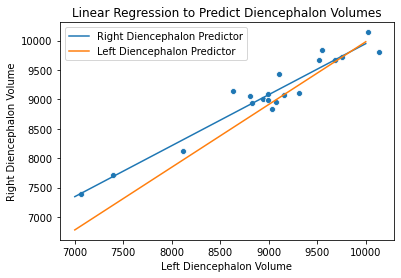

In [5]:
# Plot the diencephalon data with right on the vertical axis
ld = df.loc[df['roi'] == 'Diencephalon_L'];
ld = ld.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'level', 'id', 'icv', 'tbv', 'mean', 'std', 'type', 'roi'], axis = 1);
ld = ld[ld.columns[-1]].tolist();

rd = df.loc[df['roi'] == 'Diencephalon_R'];
rd = rd.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'level', 'id', 'icv', 'tbv', 'mean', 'std', 'type', 'roi'], axis = 1);
rd = rd[rd.columns[-1]].tolist();

sns.scatterplot(ld, rd);

# Find the regression line to predict right based on left 
rdbeta0, rdbeta1 = betaVals(ld, rd);
ldAxis = np.arange(7000, 10000);
plt.plot(ldAxis, rdbeta0 + rdbeta1 * ldAxis);

# Find the regression line to predict left based on right
ldbeta0, ldbeta1 = betaVals(rd, ld);
rdAxis = np.arange(7000, 10000);
plt.plot(rdAxis, ldbeta0 + ldbeta1 * rdAxis);

plt.legend(['Right Diencephalon Predictor', 'Left Diencephalon Predictor']);
plt.xlabel('Left Diencephalon Volume');
plt.ylabel('Right Diencephalon Volume');
plt.title('Linear Regression to Predict Diencephalon Volumes');

# Part 7

If we divide a set of numbers by their standard deviation, we have normalized that set of numbers to have a new standard deviation of 1. Thus, if we divide X and Y by their respective standard deviations, we get that std(X) = 1, std(Y) = 1. 

We know that the equation to calculate $\beta_1$ in a linear regression model is 

$\beta_1 = Corr(X, Y) * \frac{Sd(Y)}{Sd(X)}$

Since we know that Sd(Y) = Sd(x) = 1, we can say that

$\beta_1 = Corr(X, Y) * \frac{1}{1} = Corr(X, Y)$

We could stop here, but let's keep going since we can simplify this more. 

Note: I am not sure if the rest of this is correct, so I am going to say that my answer stops at the lines above, but I am including this for feedback on if my math thinking is correct...

We know that
$Corr(X,Y) = \frac{Cov(X, Y)}{S_x S_y}$

If we substitute this expression for $Corr(X, Y)$ in the equation for $\beta_1$, we get

$\beta_1 = \frac{Cov(X, Y)}{S_x S_y} * \frac{Sd(Y)}{Sd(X)} $

We know that since the standard deviations of X and Y are both 1, the variances of X and Y must also be 1 because $S = {Sd}^2 = 1^2 = 1$. Thus,

$\beta_1 = \frac{Cov(X, Y)}{1 * 1} * \frac{1}{1} = Cov(X, Y)$.